In [16]:
import matplotlib.pyplot as plt
import numpy as np

from cv19gm.cv19sim import CV19SIM

# CV19SIM serves as an interphace with the all the models in the library


# Simple models using default configuration file

In [2]:
model1 = CV19SIM(compartmentalmodel = 'SEIR')
model2 = CV19SIM(compartmentalmodel = 'SIR')

Missing configuration file, using default
Missing configuration file, using default


In [3]:
model1.run()
model2.run()

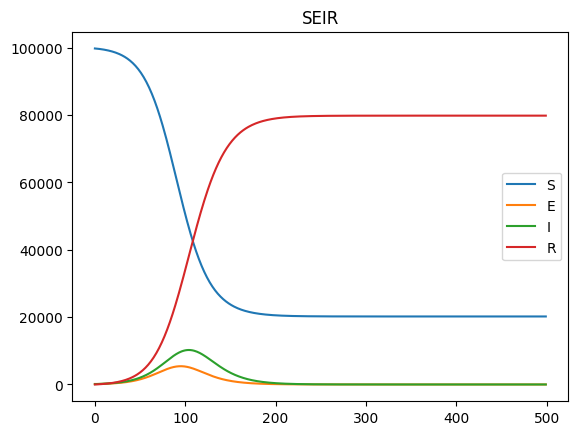

In [4]:
plt.plot(model1.t,model1.S,label='S')
plt.plot(model1.t,model1.E,label='E')
plt.plot(model1.t,model1.I,label='I')
plt.plot(model1.t,model1.R,label='R')
plt.legend(loc=0)
plt.title('SEIR')
plt.show()

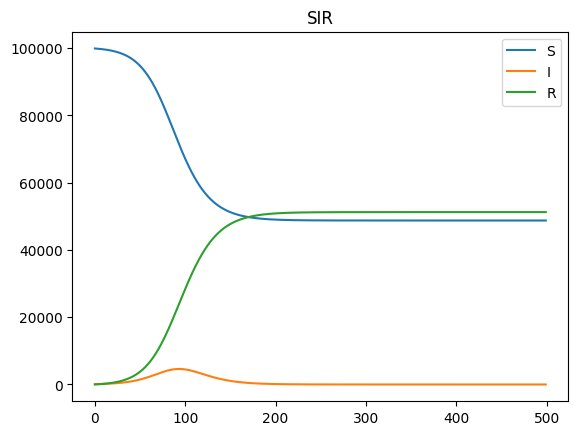

In [5]:
plt.plot(model2.t,model2.S,label='S')
plt.plot(model2.t,model2.I,label='I')
plt.plot(model2.t,model2.R,label='R')
plt.legend(loc=0)
plt.title('SIR')
plt.show()

# SEIR model using config file and overriding some parameters

In [9]:
model3 = CV19SIM(config='cfg/SEIR.toml',beta = 0.3, tI_R = 10,t_end=200)

In [10]:
model3.run()

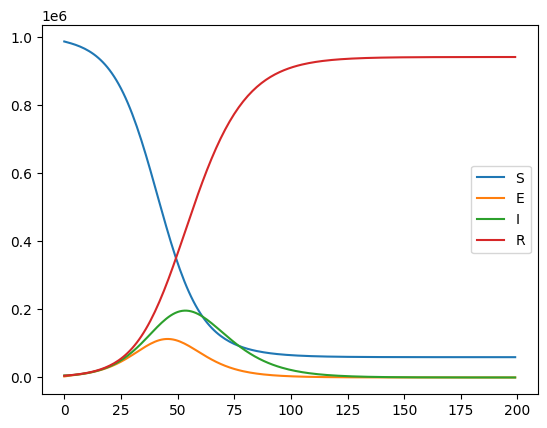

In [11]:
plt.plot(model3.t,model3.S,label='S')
plt.plot(model3.t,model3.E,label='E')
plt.plot(model3.t,model3.I,label='I')
plt.plot(model3.t,model3.R,label='R')
plt.legend(loc=0)
plt.show()

# SEIR with custom functions as params

In [12]:
import cv19gm.utils.cv19functions as cv19functions

In [34]:
beta = 0.4

In [50]:
alpha = cv19functions.events(values=[0.8,1,0.6,0.9],days=[[0,40],[40,80],[80,100],[100,150]],default=1)

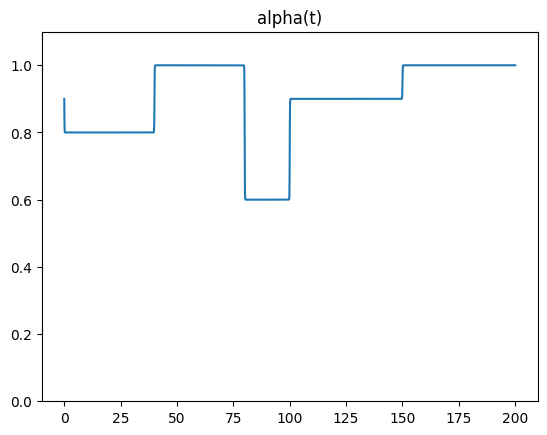

In [51]:
t = np.linspace(0,200,2000)
plt.plot(t,alpha(t))
plt.ylim(0,1.1)
plt.title('alpha(t)')
plt.show()

In [55]:
model4 = CV19SIM(config='cfg/SEIRHVD.toml',beta = beta,alpha = alpha, I = 500, t_end=200)

In [56]:
model4.run()

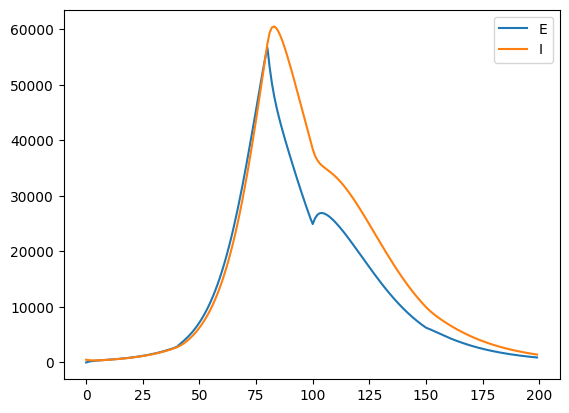

In [57]:
#plt.plot(model4.t,model4.S,label='S')
plt.plot(model4.t,model4.E,label='E')
plt.plot(model4.t,model4.I,label='I')
#plt.plot(model4.t,model4.R,label='R')
plt.legend(loc=0)
plt.show()